# Part 1

In [ ]:
# import requiring module packages

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Q1

boston = pd.read_csv('boston_csv.csv')

for i in range(len(boston.columns)):
  for j in range(len(boston.index)):
    if (boston.iloc[j,i] == "na") or (boston.iloc[j,i] == "NaN"):
      boston.iloc[j,i] = np.nan

boston.dropna(how='any', axis=0, inplace=True)

In [ ]:
# Q2

boston.describe()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,MEDV,CAT. MEDV
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,3.641708,11.418327,11.163765,0.069721,6.284805,68.514542,3.797274,9.605578,409.095618,18.456574,356.353506,22.564343,0.167331
std,8.629979,23.396912,6.873538,0.254930,0.705085,28.247125,2.111828,8.717100,168.859125,2.165559,91.587527,9.217580,0.373643
min,0.009060,0.000000,0.460000,0.000000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,5.000000,0.000000
25%,0.082492,0.000000,5.190000,0.000000,5.884250,44.550000,2.091150,4.000000,279.250000,17.400000,375.240000,17.100000,0.000000
50%,0.262660,0.000000,9.690000,0.000000,6.208500,77.150000,3.207450,5.000000,330.000000,19.050000,391.340000,21.200000,0.000000
75%,3.689388,12.500000,18.100000,0.000000,6.628000,94.100000,5.213925,24.000000,666.000000,20.200000,396.120000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,50.000000,1.000000


<ipython-input-33-62713d68317c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bos_corr = boston.corr().round(1)


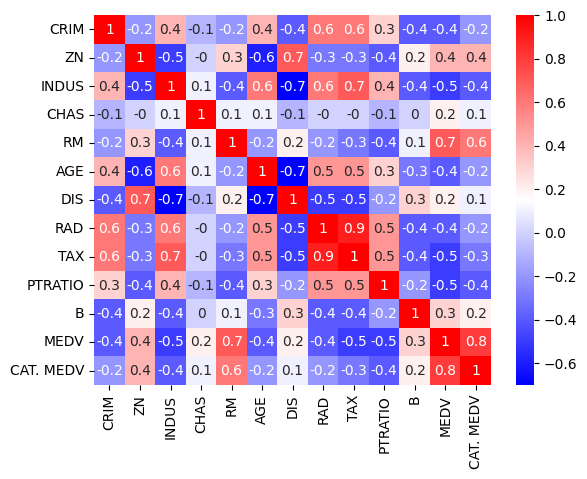

In [ ]:
bos_corr = boston.corr().round(1)
sns.heatmap(data = bos_corr, annot = True, cmap = "bwr")

In [ ]:
# Q3

npLSTAT = np.array(boston.LSTAT).reshape(-1,1)
npMEDV = np.array(boston.MEDV).reshape(-1,1)

npLSTAT_train, npLSTAT_test, npMEDV_train, npMEDV_test = \
train_test_split(npLSTAT, npMEDV, test_size=0.25, random_state = 5)

lm_bos = LinearRegression()
lm_bos.fit(npLSTAT_train, npMEDV_train)

print('intercept : ', lm_bos.intercept_)
print('slope : ', lm_bos.coef_)
print('')

# Model Performance for training set
npMEDV_train_pred = lm_bos.predict(npLSTAT_train)
r2_train = lm_bos.score(npLSTAT_train, npMEDV_train)
mse_train = mean_squared_error(npMEDV_train, npMEDV_train_pred)
print('Model Performance for training set')
print('==================================')
print('R2 score is {}'.format(r2_train))
print('MSE is {}'.format(mse_train))
print('')

# Model Performance for testing set
npMEDV_test_pred = lm_bos.predict(npLSTAT_test)
r2_test = lm_bos.score(npLSTAT_test, npMEDV_test)
mse_test = mean_squared_error(npMEDV_test, npMEDV_test_pred)
print('Model Performance for testing set')
print('==================================')
print('R2 score is {}'.format(r2_test))
print('MSE is {}'.format(mse_test))

intercept :  [34.75736445]
slope :  [[-0.95964854]]

Model Performance for training set
R2 score is 0.5385112313032364
MSE is 39.90119324233567

Model Performance for testing set
R2 score is 0.5838467237751881
MSE is 33.0849228239227


In [ ]:
# Q4

X = boston[['LSTAT', 'TAX']]
X = np.array(X).astype(float)
Y = boston['MEDV']

X_train, X_test, Y_train, Y_test = \
train_test_split(X,Y,test_size = 0.25, random_state = 5)

lm_multivar = LinearRegression()
lm_multivar.fit(X,Y)

print('intercept : ', lm_multivar.intercept_)
print('slope : ', lm_multivar.coef_)
print('')

# Model Performance for training set
Y_train_pred = lm_multivar.predict(X_train)
r2_train = lm_multivar.score(X_train, Y_train)
mse_train = mean_squared_error(Y_train, Y_train_pred)
print('Model Performance for training set')
print('==================================')
print('R2 score is {}'.format(r2_train))
print('MSE is {}'.format(mse_train))
print('')

# Model Performance for testing set
Y_test_pred = lm_multivar.predict(X_test)
r2_test = lm_multivar.score(X_test, Y_test)
mse_test = mean_squared_error(Y_test, Y_test_pred)
print('Model Performance for testing set')
print('==================================')
print('R2 score is {}'.format(r2_test))
print('MSE is {}'.format(mse_test))

intercept :  36.0097986171735
slope :  [-0.88564713 -0.00541221]

Model Performance for training set
R2 score is 0.5457552240643478
MSE is 39.274863904303366

Model Performance for testing set
R2 score is 0.5898887983993809
MSE is 32.60456718560781


# Part 2

In [ ]:
wine = pd.read_csv('wine_data.csv')
wine.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
X_train, X_test, y_train, y_test = \
train_test_split(wine.iloc[:,1:], wine['Class'], test_size = 0.3, random_state = 5)

knn_wine = KNeighborsClassifier()
knn_wine.fit(X_train, y_train)

def prediction_accuracy(knn, k, x, y):
  KNeighborsClassifier(n_neighbors=k)
  y_pred = knn.predict(x)
  accurate_pred = 0
  for i in range(len(x)):
    if y.values[i] == y_pred[i]:
      accurate_pred += 1
  accuracy = accurate_pred/len(x)*100
  print('Case when k =', k)
  print('Accuracy : ', accuracy, '(%)')

prediction_accuracy(knn_wine, 5, X_train, y_train)
prediction_accuracy(knn_wine, 5, X_test, y_test)
prediction_accuracy(knn_wine, 3, X_train, y_train)
prediction_accuracy(knn_wine, 3, X_test, y_test)

Case when k = 5
Accuracy :  80.64516129032258 (%)
Case when k = 5
Accuracy :  70.37037037037037 (%)
Case when k = 3
Accuracy :  80.64516129032258 (%)
Case when k = 3
Accuracy :  70.37037037037037 (%)


In [ ]:
X_train, X_test, y_train, y_test = \
train_test_split(wine.iloc[:,1:5], wine['Class'], test_size = 0.3, random_state = 13)

knn_wine = KNeighborsClassifier()
knn_wine.fit(X_train, y_train)

prediction_accuracy(knn_wine, 5, X_train, y_train)
prediction_accuracy(knn_wine, 5, X_test, y_test)
prediction_accuracy(knn_wine, 3, X_train, y_train)
prediction_accuracy(knn_wine, 3, X_test, y_test)

Case when k = 5
Accuracy :  84.67741935483872 (%)
Case when k = 5
Accuracy :  79.62962962962963 (%)
Case when k = 3
Accuracy :  84.67741935483872 (%)
Case when k = 3
Accuracy :  79.62962962962963 (%)
